<a href="https://colab.research.google.com/github/Ahmad-Yas/AI4CCEE_Fall_2024/blob/main/in_class_activity/Lecture5/submissions/LECTURE5_AHMAD_YASEEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#PRINT(ACT1)

In [4]:
X = car_speed_data_filtered[['Time_numeric']]
y = car_speed_data_filtered['WAVE-NE-Speed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae, rmse


(2.2155461418689306, 3.5617431887597437)

In [7]:
import pandas as pd
file_path = '/content/Car_Speed.csv'
data = pd.read_csv(file_path)
data.head()


,day,Time,WAVE-NE-Count,WAVE-NE-Speed,WAVE-SW-Count,WAVE-SW-Speed,Month,Year
0,1,2022-07-10 00:00:00,NaN,NaN,3.0,59.5,10,2021
1,1,2022-07-10 00:01:00,10.0,62.0,2.0,59.0,10,2021
2,1,2022-07-10 00:02:00,5.0,63.6,4.0,58.4,10,2021
3,1,2022-07-10 00:03:00,11.0,58.2,9.0,60.0,10,2021
4,1,2022-07-10 00:04:00,19.0,60.2,17.0,61.2,10,2021


In [8]:
july_data = data[(data['Month'] == 7) & (data['Year'] == 2022)]
july_data_clean = july_data[['Time', 'WAVE-NE-Speed']].dropna()
july_data_clean['Time'] = pd.to_datetime(july_data_clean['Time'])
july_data_clean['Time_in_seconds'] = july_data_clean['Time'].dt.hour * 3600 + july_data_clean['Time'].dt.minute * 60 + july_data_clean['Time'].dt.second
july_data_clean.head()


,Time,WAVE-NE-Speed,Time_in_seconds


In [9]:
available_months_years = data[['Month', 'Year']].drop_duplicates()
available_months_years


,Month,Year
0,10,2021
37868,9,2021
37870,11,2021
74943,12,2021
112512,1,2022
151048,2,2022
183174,3,2022


In [10]:
march_data = data[(data['Month'] == 3) & (data['Year'] == 2022)]
march_data_clean = march_data[['Time', 'WAVE-NE-Speed']].dropna()
march_data_clean['Time'] = pd.to_datetime(march_data_clean['Time'])
march_data_clean['Time_in_seconds'] = march_data_clean['Time'].dt.hour * 3600 + march_data_clean['Time'].dt.minute * 60 + march_data_clean['Time'].dt.second
march_data_clean.head()


,Time,WAVE-NE-Speed,Time_in_seconds
183174,2022-07-10 00:00:00,61.4,0
183175,2022-07-10 00:01:00,66.2,60
183176,2022-07-10 00:02:00,63.8,120
183177,2022-07-10 00:04:00,64.4,240
183178,2022-07-10 00:05:00,62.2,300


In [11]:
march_data_corrected = data[(data['Month'] == 3) & (data['Year'] == 2022)]
march_data_corrected_clean = march_data_corrected[['Time', 'WAVE-NE-Speed']].dropna()
march_data_corrected_clean['Time'] = pd.to_datetime(march_data_corrected_clean['Time'])
march_data_corrected_clean['Time_in_seconds'] = march_data_corrected_clean['Time'].dt.hour * 3600 + march_data_corrected_clean['Time'].dt.minute * 60 + march_data_corrected_clean['Time'].dt.second
march_data_corrected_clean.head()


,Time,WAVE-NE-Speed,Time_in_seconds
183174,2022-07-10 00:00:00,61.4,0
183175,2022-07-10 00:01:00,66.2,60
183176,2022-07-10 00:02:00,63.8,120
183177,2022-07-10 00:04:00,64.4,240
183178,2022-07-10 00:05:00,62.2,300


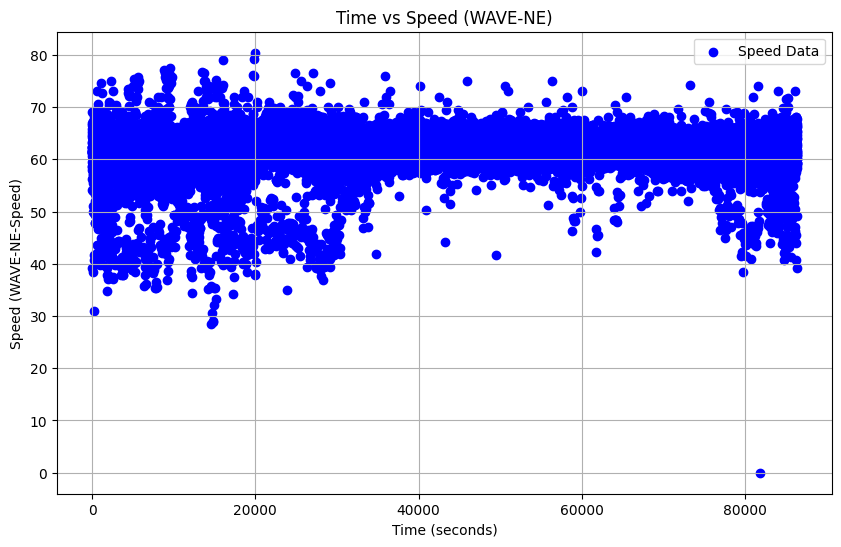

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(march_data_corrected_clean['Time_in_seconds'], march_data_corrected_clean['WAVE-NE-Speed'], color='blue', label='Speed Data')
plt.title('Time vs Speed (WAVE-NE)')
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (WAVE-NE-Speed)')
plt.grid(True)
plt.legend()
plt.show()


In [23]:
#act-2

In [24]:
import pandas as pd
file_path = '/content/Car_Speed.csv'
car_speed_data = pd.read_csv(file_path)
car_speed_data.head()


,day,Time,WAVE-NE-Count,WAVE-NE-Speed,WAVE-SW-Count,WAVE-SW-Speed,Month,Year
0,1,2022-07-10 00:00:00,NaN,NaN,3.0,59.5,10,2021
1,1,2022-07-10 00:01:00,10.0,62.0,2.0,59.0,10,2021
2,1,2022-07-10 00:02:00,5.0,63.6,4.0,58.4,10,2021
3,1,2022-07-10 00:03:00,11.0,58.2,9.0,60.0,10,2021
4,1,2022-07-10 00:04:00,19.0,60.2,17.0,61.2,10,2021


<ipython-input-25-7fa6cf83b9c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_speed_cleaned['Cluster'] = kmeans.fit_predict(speed_data)


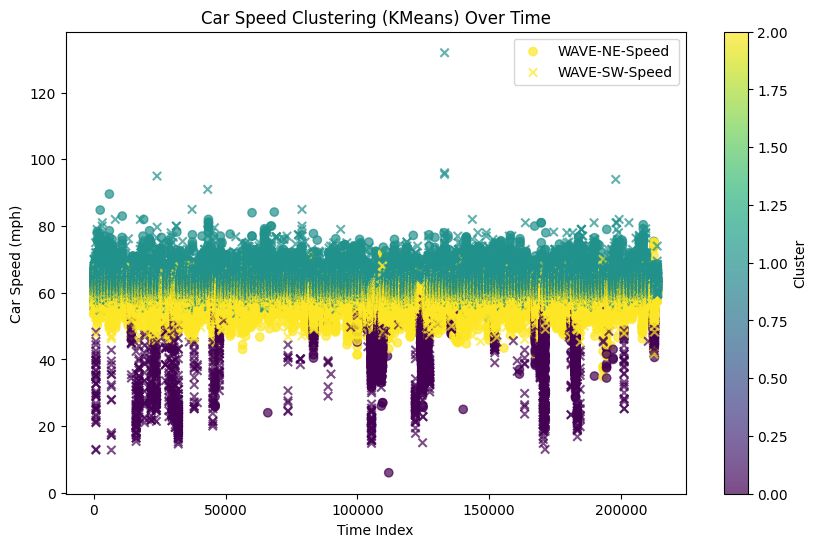

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
car_speed_cleaned = car_speed_data.dropna(subset=['WAVE-NE-Speed', 'WAVE-SW-Speed'])
time_index = range(len(car_speed_cleaned))
speed_data = car_speed_cleaned[['WAVE-NE-Speed', 'WAVE-SW-Speed']]
kmeans = KMeans(n_clusters=3, random_state=42)
car_speed_cleaned['Cluster'] = kmeans.fit_predict(speed_data)
plt.figure(figsize=(10, 6))
plt.scatter(time_index, car_speed_cleaned['WAVE-NE-Speed'], c=car_speed_cleaned['Cluster'], cmap='viridis', label='WAVE-NE-Speed', alpha=0.7)
plt.scatter(time_index, car_speed_cleaned['WAVE-SW-Speed'], c=car_speed_cleaned['Cluster'], cmap='viridis', label='WAVE-SW-Speed', marker='x', alpha=0.7)
plt.title('Car Speed Clustering (KMeans) Over Time')
plt.xlabel('Time Index')
plt.ylabel('Car Speed (mph)')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

In [26]:
#act3

In [83]:
import pandas as pd
df = pd.read_csv('/content/Ames_August_Crashes_Clean.csv')  # Use the name of the file after upload


In [84]:
df.head()


,Date,DOT Case #,Agency Case #,City,County,Severity,Literal Description
0,8/1/2024,20241436054,24002750,Ames,Story,Property Damage Only,US 69 S ...
1,8/1/2024,20241435378,24002751,Ames,Story,Suspected Serious Injury Crash,VALLEY VIEW RD AND HARRISON RD ...
2,8/2/2024,20241435839,24002760,Ames,Story,Possible/Unknown Injury Crash,24TH ST ...
3,8/2/2024,20241436408,24002762,Ames,Story,Property Damage Only,ONTARIO ST ...
4,8/4/2024,20241435605,24002790,Ames,Story,Property Damage Only,SE 16TH ST ...


In [85]:
df.head()


,Date,DOT Case #,Agency Case #,City,County,Severity,Literal Description
0,8/1/2024,20241436054,24002750,Ames,Story,Property Damage Only,US 69 S ...
1,8/1/2024,20241435378,24002751,Ames,Story,Suspected Serious Injury Crash,VALLEY VIEW RD AND HARRISON RD ...
2,8/2/2024,20241435839,24002760,Ames,Story,Possible/Unknown Injury Crash,24TH ST ...
3,8/2/2024,20241436408,24002762,Ames,Story,Property Damage Only,ONTARIO ST ...
4,8/4/2024,20241435605,24002790,Ames,Story,Property Damage Only,SE 16TH ST ...


In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 51 non-null     object
 1   DOT Case #           51 non-null     int64 
 2   Agency Case #        51 non-null     object
 3   City                 51 non-null     object
 4   County               51 non-null     object
 5   Severity             51 non-null     object
 6   Literal Description  51 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


In [87]:
df.describe()


,DOT Case #
count,5.100000e+01
mean,2.024144e+10
std,1.471415e+03
min,2.024144e+10
25%,2.024144e+10
50%,2.024144e+10
75%,2.024144e+10
max,2.024144e+10


In [88]:
target_column = 'Severity'


In [89]:
feature_columns = ['DOT Case #', 'Date', 'Literal Description']  # Adjust names based on actual dataset
X = df[feature_columns]
y = df[target_column]

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame (replace with your actual DataFrame)
data = {'DOT Case #': [1, 2, 3, 4],
        'Date': ['08/07/2024', '08/06/2024', '08/05/2024', '08/04/2024'],
        'Literal Description': ['Accident', 'Collision', 'Crash', 'Fender Bender'],
        'Severity': [1, 2, 3, 1]}
df = pd.DataFrame(data)

target_column = 'Severity'
feature_columns = ['DOT Case #', 'Date', 'Literal Description']
X = df[feature_columns]
y = df[target_column]

# Convert 'Date' column to datetime objects
X['Date'] = pd.to_datetime(X['Date'])

# Extract numerical features from the date
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop('Date', axis=1)  # Remove the original 'Date' column

# Encode 'Literal Description' using LabelEncoder
label_encoder = LabelEncoder()
X['Literal Description'] = label_encoder.fit_transform(X['Literal Description'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

<ipython-input-92-d1de7dd8878f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = pd.to_datetime(X['Date'])


RandomForestClassifier()

In [93]:
y_pred = rf_model.predict(X_test)

In [94]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [97]:
importances = rf_model.feature_importances_
# Get the correct feature names after transformations
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

               Feature  Importance
0           DOT Case #    0.376984
1  Literal Description    0.337302
4                  Day    0.285714
2                 Year    0.000000
3                Month    0.000000


In [99]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.0


In [100]:
print(y_train.value_counts())


Severity
1    2
3    1
Name: count, dtype: int64


In [101]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

In [104]:
X = df[feature_columns]

In [105]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_train, y_train, cv=2, scoring='accuracy')
print(f'Cross-validation accuracy: {scores.mean()}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Cross-validation accuracy: 0.75
